In [128]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [129]:
# Step 1: Data Loading and Preprocessing
df = pd.read_csv('oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [130]:
df.shape

(937, 50)

In [131]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [132]:
 df.info()
#view the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

# Checking And Handling the null value and duplicates

In [180]:
df.duplicated().sum()#check the duplicate

0

In [183]:
 # Summary of the data set
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [133]:
df.isnull().sum()#ckeck the null value

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

In [134]:
df.dtypes

f_1         int64
f_2         int64
f_3       float64
f_4       float64
f_5         int64
f_6         int64
f_7       float64
f_8       float64
f_9       float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23        int64
f_24      float64
f_25      float64
f_26      float64
f_27      float64
f_28      float64
f_29      float64
f_30      float64
f_31      float64
f_32      float64
f_33      float64
f_34      float64
f_35        int64
f_36        int64
f_37      float64
f_38      float64
f_39        int64
f_40        int64
f_41      float64
f_42      float64
f_43      float64
f_44      float64
f_45      float64
f_46        int64
f_47      float64
f_48      float64
f_49      float64
target      int64
dtype: object

In [135]:
df.dtypes.value_counts()

float64    39
int64      11
dtype: int64

In [136]:
df.duplicated().sum()

0

# Inference
1) There are no duplicates in train and test data.

In [137]:
df['f_1'].nunique()

238

In [138]:
#df.drop('f_1',inplace=True,axis=1)
#df.columns

In [139]:
df['target'].nunique()

2

# Target Variable 

In [140]:
df['target'].value_counts()

0    896
1     41
Name: target, dtype: int64

# Exploratory Data Analysis

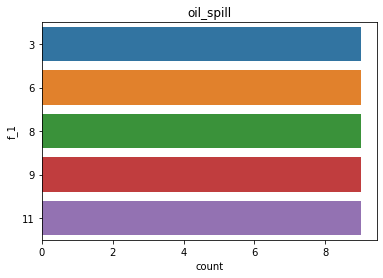

In [174]:
sns.countplot(y=df['f_1'],
 order=df['f_1'].value_counts().sort_values(ascending=False)[:5].index)
plt.title('oil_spill')
plt.show()

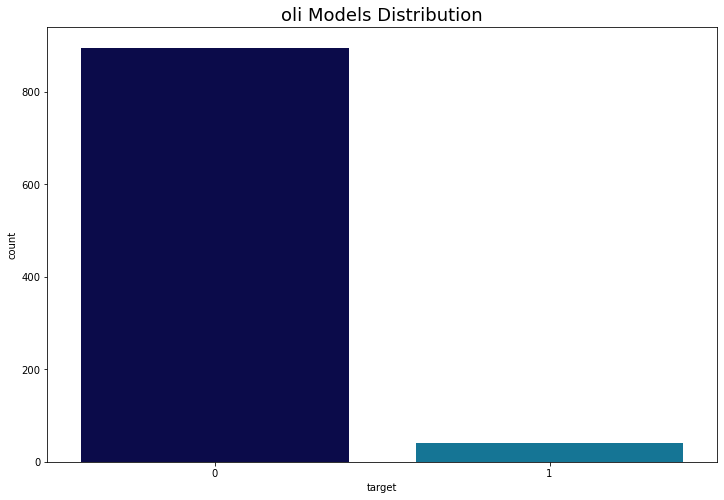

In [186]:
 # Plot of Car Models Distribution
figure=plt.figure(figsize=(12,8))
plt.title('oli Models Distribution', fontsize=18)
plot = sns.countplot(x="target", data=df, order = df['target'].value_counts().index[:5], palette='ocean')
plt.show()

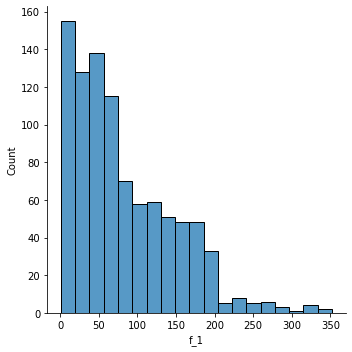

<Figure size 576x432 with 0 Axes>

In [191]:
sns.displot(df['f_1'])
plt.figure(figsize=(8,6))
plt.show()

# data processing

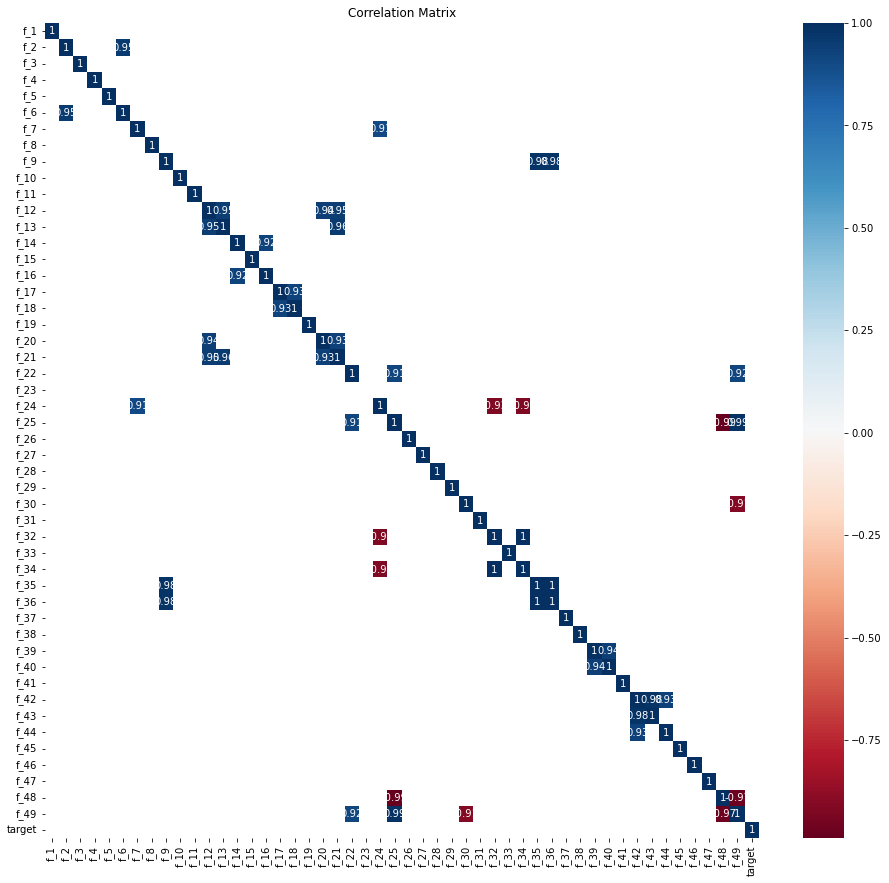

In [169]:
corr = df.corr()
plt.figure(figsize=(16,15))
corr = corr[abs(corr)>=0.9]
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

# Selecting Dependent and Independent Features

In [142]:
x = df.drop('target',axis=1)
y = df['target']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 49)
(937,)


# Split the data into train and test

In [145]:
# Spliting training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(749, 49)
(188, 49)
(749,)


# Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score

In [149]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [150]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

# Import ML model building libraries

In [151]:
# Major Import
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [152]:
x_train.dtypes

f_1       int64
f_2       int64
f_3     float64
f_4     float64
f_5       int64
f_6       int64
f_7     float64
f_8     float64
f_9     float64
f_10    float64
f_11    float64
f_12    float64
f_13    float64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23      int64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
f_29    float64
f_30    float64
f_31    float64
f_32    float64
f_33    float64
f_34    float64
f_35      int64
f_36      int64
f_37    float64
f_38    float64
f_39      int64
f_40      int64
f_41    float64
f_42    float64
f_43    float64
f_44    float64
f_45    float64
f_46      int64
f_47    float64
f_48    float64
f_49    float64
dtype: object

# Columns index that needs to undergo OneHotEncoding - [0,2,3,4,5]

In [159]:
scores=[]
for i in range(20):
    x_train,x_test, y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state=42)
    stap2 = LinearRegression()
    pipe_lr = Pipeline([('step1',step1),('step2',step2)])
    pipe_lr.fit(x_train, y_train)
    y_pred=pipe_lr.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
    print(r2_score(y_test,y_pred), i)

0.2955894919281641 0
0.2955894919281641 1
0.2955894919281641 2
0.2955894919281641 3
0.2955894919281641 4
0.2955894919281641 5
0.2955894919281641 6
0.2955894919281641 7
0.2955894919281641 8
0.2955894919281641 9
0.2955894919281641 10
0.2955894919281641 11
0.2955894919281641 12
0.2955894919281641 13
0.2955894919281641 14
0.2955894919281641 15
0.2955894919281641 16
0.2955894919281641 17
0.2955894919281641 18
0.2955894919281641 19


In [160]:
scores[np.argmax(scores)]

0.2955894919281641

In [166]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,10])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=11,random_state=5)
pipe_rf = Pipeline([('step1',step1),('step2',step2)])
pipe_rf.fit(x_train,y_train)
ypred_rf = pipe_rf.predict(x_test)
eval_model(y_test,ypred_rf)

MAE 0.03653915995314097
MSE 0.014754021406608362
RMSE 0.12146613275563013
R2 Score 0.5224669115428884


In [161]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,10])],remainder='passthrough')

step2 = LinearRegression()
pipe_lr = Pipeline([('step1',step1),('step2',step2)])
pipe_lr.fit(x_train,y_train)
ypred_lr = pipe_lr.predict(x_test)
eval_model(y_test,ypred_lr)

MAE 0.0995100903690714
MSE 0.025066758682166682
RMSE 0.15832485175160177
R2 Score 0.18868175928342557


In [162]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,10])],remainder='passthrough')
step2 = Ridge(alpha=2.41)
pipe_rid = Pipeline([('step1',step1),('step2',step2)])
pipe_rid.fit(x_train,y_train)
ypred_rid = pipe_rid.predict(x_test)
eval_model(y_test,ypred_rid)

MAE 0.08541308322564642
MSE 0.020896218594719514
RMSE 0.14455524409276724
R2 Score 0.32366671244343725


In [163]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,10])],remainder='passthrough')
step2 = Lasso(alpha=0.234)
pipe_las = Pipeline([('step1',step1),('step2',step2)])
pipe_las.fit(x_train,y_train)
ypred_las = pipe_las.predict(x_test)
eval_model(y_test,ypred_las)

MAE 0.07227085712757703
MSE 0.021936165973418888
RMSE 0.14810862896340268
R2 Score 0.2900074632193066


In [164]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,10])],remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=11,random_state=5)
pipe_dt = Pipeline([('step1',step1),('step2',step2)])
pipe_dt.fit(x_train,y_train)
ypred_dt = pipe_dt.predict(x_test)
eval_model(y_test,ypred_dt)

MAE 0.037846232332022924
MSE 0.021763701754596108
RMSE 0.14752525802246919
R2 Score 0.2955894919281641


# Random Forrest model is best performing model in terms of RMSE value

In [192]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


In [193]:
 import pickle

In [195]:
# Step 5: Save and Load the Best Model
# Save the model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(df, file)

In [196]:
# Load the saved model
with open('best_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

In [205]:
#print(type(loaded_pipeline))

In [204]:
#predict_price = loaded_pipeline.predict(new_df)

In [202]:
#new_df['predict_price']= predict_price
#new_df.head(20)